In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import seaborn as sns
import matplotlib.pyplot as plt

# #BUSINESS PROBLEM 1

In [2]:
# importing the data
loan_data=pd.read_csv("/kaggle/input/python-case-study-5-hypothesis-testing/LoansData.csv")

In [3]:
loan_data

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.00,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.00,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.00,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.00,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.00,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,29950.00,16.77%,60 months,debt_consolidation,19.23%,NY,MORTGAGE,9250.00,705-709,15.0,45880.0,1.0,8 years
2496,16000.0,16000.00,14.09%,60 months,home_improvement,21.54%,MD,OWN,8903.25,740-744,18.0,18898.0,1.0,10+ years
2497,10000.0,10000.00,13.99%,36 months,debt_consolidation,4.89%,PA,MORTGAGE,2166.67,680-684,4.0,4544.0,0.0,10+ years
2498,6000.0,6000.00,12.42%,36 months,major_purchase,16.66%,NJ,RENT,3500.00,675-679,8.0,7753.0,0.0,5 years


In [4]:
#checking the datatypes
loan_data.dtypes

Amount.Requested                  float64
Amount.Funded.By.Investors        float64
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

In [5]:
loan_data.isna().sum()

Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      2
Loan.Length                        0
Loan.Purpose                       0
Debt.To.Income.Ratio               1
State                              0
Home.Ownership                     1
Monthly.Income                     1
FICO.Range                         2
Open.CREDIT.Lines                  3
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 77
dtype: int64

In [6]:
loan_data.duplicated().sum()

0

In [7]:
#checking for continuous or categorical variable
loan_data.nunique()

Amount.Requested                   380
Amount.Funded.By.Investors         710
Interest.Rate                      275
Loan.Length                          2
Loan.Purpose                        14
Debt.To.Income.Ratio              1669
State                               46
Home.Ownership                       5
Monthly.Income                     632
FICO.Range                          38
Open.CREDIT.Lines                   29
Revolving.CREDIT.Balance          2349
Inquiries.in.the.Last.6.Months      10
Employment.Length                   11
dtype: int64

In [8]:
loan_data['Interest.Rate']=loan_data['Interest.Rate'].str.replace('%','')
loan_data['Interest.Rate']=loan_data['Interest.Rate'].astype('float64')

In [9]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   float64
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

In [10]:
#first, we'll fill null values before further calculation
loan_data['Interest.Rate'].fillna(loan_data['Interest.Rate'].mean(), inplace=True)
loan_data['Amount.Requested'].fillna(loan_data['Amount.Requested'].mean(), inplace=True)
loan_data['Amount.Funded.By.Investors'].fillna(loan_data['Amount.Funded.By.Investors'].mean(), inplace=True)
loan_data['FICO.Range'].fillna('670-674', inplace=True)
loan_data['Home.Ownership'].fillna('MORTGAGE', inplace=True)

### BUSINESS PROBLEM:
**Using lending club loans data, the team would like to test below hypothesis on how different
factors effecing each other (Hint: You may leverage hypothesis testing using statistical tests)**
* ***a. Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts)***

###  Ans.a),
#### Step 1. Define null hypothesis , Ho:
* ***Ho= Intrest rate does not vary for different loan amounts.(Less intrest is not charged for high loan amounts)***

#### Step 2. Define null hypothesis , Ha:
* ***Ha=  Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts).***

#### Step 3. Define CI :
* ***CI = 95% , pvalue =0.05***

#### Step 4. Perform test:
* ***Co-Relations (Pearson Co-efficient) as we have to find out the relationship between 2 continuous variables***

In [11]:
stats.pearsonr(loan_data['Interest.Rate'],loan_data['Amount.Requested'])

(0.33244640596656827, 1.4148683739824417e-65)

#### Step 5. Business conclusion:
* ***initial p-value= 0.05***
* ***new p-value= 1.4148683739824417e-65***

* **since new p-value< initial p-value , we will REJECT Ho with 95% accuracy.**
* **Therefore, Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts).**

### Q ***b. Loan length is directly effecting intrest rate.***

###  Ans.b),
#### Step 1. Define null hypothesis , Ho:
* ***Ho= Loan length is not effecting intrest rate.***

#### Step 2. Define null hypothesis , Ha:
* ***Ha= Loan length is directly effecting intrest rate..***

#### Step 3. Define CI :
* ***CI = 95% , pvalue =0.05***

#### Step 4. Perform test:
* ***we will perform the T-Test for independent two variable. as these are two different variable.***


In [12]:
a=loan_data.loc[loan_data["Loan.Length"]=='36 months','Interest.Rate' ]
b=loan_data.loc[loan_data["Loan.Length"]=='60 months','Interest.Rate' ]

In [13]:
stats.ttest_ind(a,b)

Ttest_indResult(statistic=-23.41049023613487, pvalue=9.549596064332559e-110)

#### Step 5. Business conclusion:
* ***initial p-value= 0.05***
* ***new p-value= 9.549596064332559e-110***

* **since new p-value< initial p-value , we will REJECT Ho.**
* **Therefore, Loan length is directly effecting intrest rate.**

### Q  ***c. Interest rate varies for different purpose of loans***

###  Ans.c),
#### Step 1. Define null hypothesis , Ho:
* ***Ho= Interest rate does not vary for different purpose of loans.***

#### Step 2. Define null hypothesis , Ha:
* ***Ha= Interest rate varies for different purpose of loans.***

#### Step 3. Define CI :
* ***CI = 95% , pvalue =0.05***

#### Step 4. Perform test:
* ***Co-Relations (Spearson Rank) as we have determine the relationship between categorical and continuous variable.***


In [14]:
stats.spearmanr(loan_data['Loan.Purpose'],loan_data['Interest.Rate'])

SpearmanrResult(correlation=-0.06035663579266386, pvalue=0.0025354766301471797)

#### Step 5. Business conclusion:
* ***initial p-value= 0.05***
* ***new p-value= 0.0025354766301471797***

* **since new p-value< initial p-value , we will REJECT Ho.**
* **Therefore, Interest rate varies for different purpose of loans.**

### Q  ***d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.***

###  Ans.d),
#### Step 1. Define null hypothesis , Ho:
* ***Ho= There is no relationship between FICO scores and Home Ownership.***

#### Step 2. Define null hypothesis , Ha:
* ***Ha= There is relationship between FICO scores and Home Ownership.***

#### Step 3. Define CI :
* ***CI = 95% , pvalue =0.05***

#### Step 4. Perform test:
* ***Chi-Sq test as we have to determine the relationship between 2 categorical variables***


In [15]:
c=pd.crosstab( loan_data['Home.Ownership'],loan_data['FICO.Range'] )
c

FICO.Range,640-644,645-649,650-654,655-659,660-664,665-669,670-674,675-679,680-684,685-689,...,780-784,785-789,790-794,795-799,800-804,805-809,810-814,815-819,820-824,830-834
Home.Ownership,,,,,,,,,,,,,,,,,,,,,
MORTGAGE,0,1,1,0,41,52,68,79,55,61,...,21,12,15,7,7,6,5,6,0,1
NONE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
OTHER,0,0,0,1,0,0,1,1,2,0,...,0,0,0,0,0,0,0,0,0,0
OWN,1,0,0,0,17,18,13,11,9,10,...,3,2,1,1,3,2,1,0,1,0
RENT,4,2,0,3,67,75,91,75,91,65,...,4,5,4,5,2,3,2,0,0,0


In [16]:
stats.chi2_contingency(c)


(473.5648028168521,
 1.0065160858471904e-35,
 148,
 array([[2.29600e+00, 1.37760e+00, 4.59200e-01, 1.83680e+00, 5.74000e+01,
         6.65840e+01, 7.94416e+01, 7.62272e+01, 7.20944e+01, 6.24512e+01,
         6.42880e+01, 7.02576e+01, 6.01552e+01, 6.15328e+01, 5.14304e+01,
         4.27056e+01, 5.23488e+01, 4.31648e+01, 4.31648e+01, 2.98480e+01,
         2.43376e+01, 2.47968e+01, 2.80112e+01, 2.11232e+01, 2.11232e+01,
         1.65312e+01, 7.80640e+00, 1.01024e+01, 1.28576e+01, 8.72480e+00,
         9.18400e+00, 5.96960e+00, 5.96960e+00, 5.05120e+00, 3.67360e+00,
         2.75520e+00, 4.59200e-01, 4.59200e-01],
        [2.00000e-03, 1.20000e-03, 4.00000e-04, 1.60000e-03, 5.00000e-02,
         5.80000e-02, 6.92000e-02, 6.64000e-02, 6.28000e-02, 5.44000e-02,
         5.60000e-02, 6.12000e-02, 5.24000e-02, 5.36000e-02, 4.48000e-02,
         3.72000e-02, 4.56000e-02, 3.76000e-02, 3.76000e-02, 2.60000e-02,
         2.12000e-02, 2.16000e-02, 2.44000e-02, 1.84000e-02, 1.84000e-02,
         1.4

#### Step 5. Business conclusion:
* ***initial p-value= 0.05***
* ***new p-value= 1.0065160858471904e-35***

* **since new p-value< initial p-value , we will REJECT Ho.**
* **Therefore,we can say that there is relationship between FICO scores and Home Ownership with 95% accuracy.**

# #BUSINESS PROBLEM 2

In [17]:
price_quotes=pd.read_csv("/kaggle/input/python-case-study-5-hypothesis-testing/Price_Quotes.csv")

In [18]:
price_quotes

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


In [19]:
price_quotes.duplicated().sum()

0

In [20]:
#as we can see from the table there is no null and duplicate values
price_quotes.isna().sum()

Order_Number    0
Barry_Price     0
Mary_Price      0
dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Mary_Price'>

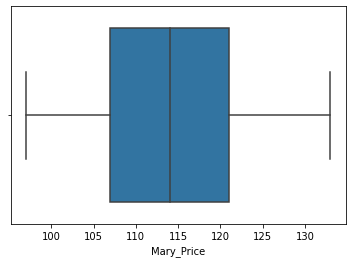

In [21]:
#checking for outliers
sns.boxplot(price_quotes.Mary_Price)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Barry_Price'>

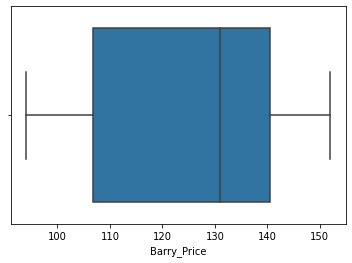

In [22]:
sns.boxplot(price_quotes.Barry_Price)

## Q. We would like to assess if there is any difference in the average price quotes provided by Mary and Barry.

## Ans.
### Step 1. Define null hypothesis , Ho:
* ***Ho= there is no difference in the average price quotes provided by Mary and Barry.***

### Step 2. Define null hypothesis , Ha:
* ***Ha= there is difference in the average price quotes provided by Mary and Barry.***

### Step 3. Define CI :
* ***CI = 95% , pvalue =0.05***

### Step 4. Perform test:
* ***T-Test as we are considering sample size of - 12***



In [23]:
stats.ttest_rel(price_quotes.Barry_Price, price_quotes.Mary_Price)


Ttest_relResult(statistic=2.521376510892349, pvalue=0.02840588045242053)

### Step 5. Business conclusion:
* ***initial p-value= 0.05***
* ***new p-value= 0.0284***

* **since new p-value< initial p-value , we will REJECT Ho.**
* **Therefore, there is difference between the average price quotes provided by Mary and Barry.**

# #BUSINESS PROBLEM 3

In [24]:
# importing the data
treatment=pd.read_csv("/kaggle/input/python-case-study-5-hypothesis-testing/Treatment_Facility.csv")

In [25]:
treatment.rename(columns ={'VAR4':'TRFF','VAR5':'CI'},inplace=True)

In [26]:
treatment.describe()

,Month,Employee_Turnover,TRFF,CI
count,20.00000,20.000000,20.000000,20.000000
mean,10.50000,14.169395,16.582433,43.199541
std,5.91608,8.836302,10.088265,41.715909
min,1.00000,0.000000,4.201681,0.000000
25%,5.75000,9.919350,9.596368,20.731427
50%,10.50000,12.470850,14.998702,25.669183
75%,15.25000,19.230750,19.807134,43.776901
max,20.00000,30.769200,41.176471,146.198830


### BUSINESS PROBLEM: Determine what effect, if any, the reengineering effort had on the incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort changed the critical incidence rate. Is there evidence that the critical incidence rate improved?

## Ans.
### Step 1. Define null hypothesis , Ho:
* ***Ho= there is no effect post the reengineer***

### Step 2. Define null hypothesis , Ha:
* ***Ha= there is effect post the reengineer***

### Step 3. Define CI :
* ***CI = 95% , pvalue =0.05***

### Step 4. Perform test:
* ***we will perform the T-Test for independent two variable. as these are two different variable.***


In [27]:
a= treatment[treatment.Reengineer== 'Prior']['CI']
a

0      42.682927
1      25.806452
2     146.198830
3     110.429448
4      23.952096
5      47.058824
6       0.000000
7      25.000000
8     132.183908
9      16.574586
10     88.757396
11     31.746032
12     10.152284
Name: CI, dtype: float64

In [28]:
b=treatment[treatment.Reengineer== 'Post']['CI']
b

13    29.126214
14    21.008403
15    34.782609
16    19.900498
17     9.950249
18    25.531915
19    23.148148
Name: CI, dtype: float64

In [29]:
stats.ttest_ind(a,b)


Ttest_indResult(statistic=1.6279144253528646, pvalue=0.12091989189884149)

### Step 5. Business conclusion:
* ***initial p-value= 0.05***
* ***new p-value= 0.12091989189884149***

* **since new p-value > initial p-value , we will ACCEPT Ho.**
* **Therefore, With the given data, cant be proved if the reengineering effort changed the critical incidence rate as p-value > 0.05.**`

# #BUSINESS PROBLEM 4

In [30]:
# importing the data
priority_df= pd.read_csv("/kaggle/input/python-case-study-5-hypothesis-testing/Priority_Assessment.csv")


In [31]:
priority_df.groupby('Priority').Days.sum()

Priority
High      985.7
Low       283.3
Medium    622.5
Name: Days, dtype: float64

### **BUSINESS PROBLEM: We will focus on the prioritization system. If the system is working, then high priority jobs, on average, should be completed more quickly than medium priority jobs, and medium priority jobs should be completed more quickly than low priority jobs. Use the data provided to determine whether this is, in fact, occurring.**

In [32]:
##FIRST, OVERALL AND PARKING
#Step 1, H0 - THE SYSTEM IS NOT WORKING
#Step 2,Ha - THE NEW SYSTEM IS WORKING
#Step 3, CI - 95% p - 0.05
#Step 4, Perform the test, - F-TEST | ANOVA 

In [33]:
priority_df.Priority.value_counts()

High      326
Medium    249
Low        67
Name: Priority, dtype: int64

In [34]:
# sample for High priority
s1= priority_df[priority_df.Priority=='High'].Days
s2= priority_df[priority_df.Priority=='Medium'].Days
s3= priority_df[priority_df.Priority=='Low'].Days


In [35]:
#calculate mean
m1= s1.mean()
m2 = s2.mean()
m3= s3.mean()
print(m1)
print(m2)
print(m3)

3.0236196319018402
2.5
4.228358208955224


In [36]:
stats.f_oneway(s1,s2,s3)

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

In [37]:
# Step 5, 
# CONCLUSION : SINCE, INITIAL P-VALUE(0.05)< NEW P- VALUE(0.16411459461716182)
#therefore, we'll ACCEPT Ho.
# THE NEW SYSTEM IS NOT WORKING

# #BUSINESS PROBLEM 5

In [38]:
#importing the data
films= pd.read_csv("/kaggle/input/python-case-study-5-hypothesis-testing/Films.csv")

In [39]:
films

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [40]:
#here, we have a spelling error in slngle
films.groupby(films.Marital_Status).Gender.count()


Marital_Status
1           88
2          208
Married     12
Single      18
Slngle       2
Name: Gender, dtype: int64

In [41]:
#to correct spelling error
films.replace('Slngle','Single', inplace=True)

In [42]:
films.isna().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     2
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [43]:
#delete all duplicate values
films.drop_duplicates(inplace=True)#duplicated()

In [44]:
# since, we know that , The patron’s gender: 1 = male; 2 = female, so we should replace it to avoid confusion
films.Gender.replace({'1':'Male', '2':'Female' }, inplace=True)
# Same goes with Marital Status ,The patron’s marital status: 1 = married, 2 = single
films.Marital_Status.replace({'1': 'Married', '2':'Single'}, inplace=True)

### Q1, What is the overall level of customer satisfaction?

### Ans, 
**Overall level of consumer satisfaction is mostly 2 and 1 , that is GOOD and EXCELLENT.**

In [45]:
films.groupby(films.Overall).Overall.sum().sort_values(ascending= False)

Overall
2.0    268.0
1.0    131.0
3.0     36.0
5.0     20.0
4.0      4.0
Name: Overall, dtype: float64

<AxesSubplot:xlabel='Overall', ylabel='Count'>

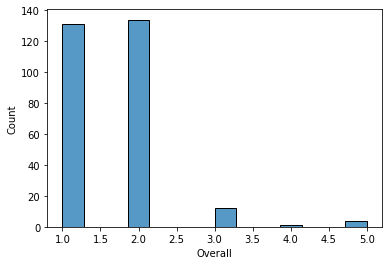

In [46]:
sns.histplot(films.Overall)

 ### Q2, What factors are linked to satisfaction?

In [47]:
#FIRST, OVERALL AND PARKING
#Step 1, H0 - No relationship
#Step 2,Ha - There is a relationship between OVERALL AND PARKING
#Step 3, CI - 95% p - 0.05
#Step 4, Perform the test, - CHI square(because we have to show relationship between 2 categorical variables)
observed =pd.crosstab(index=films.Overall,columns=(films.Parking))
observed
stats.chi2_contingency(observed)

(181.10964214817002,
 5.046695211640295e-30,
 16,
 array([[5.26797153e+01, 6.01387900e+01, 1.30533808e+01, 3.26334520e+00,
         1.86476868e+00],
        [5.34839858e+01, 6.10569395e+01, 1.32526690e+01, 3.31316726e+00,
         1.89323843e+00],
        [4.82562278e+00, 5.50889680e+00, 1.19572954e+00, 2.98932384e-01,
         1.70818505e-01],
        [4.02135231e-01, 4.59074733e-01, 9.96441281e-02, 2.49110320e-02,
         1.42348754e-02],
        [1.60854093e+00, 1.83629893e+00, 3.98576512e-01, 9.96441281e-02,
         5.69395018e-02]]))

In [48]:
# CONCLUSION : SINCE, INITIAL P-VALUE(0.05)> NEW P- VALUE(5.046695211640295e-30)
#therefore, we'll REJECT Ho.
# There is a relationship between OVERALL AND PARKING

In [49]:
# SECOND,  OVERALL AND CLEAN
#Step 1, H0 - No relationship
#Step 2,Ha - There is a relationship between OVERALL AND CLEAN
#Step 3, CI - 95% p - 0.05
#Step 4, Perform the test, - CHI square(because we have to show relationship between 2 categorical variables)
observed =pd.crosstab(index=films.Overall,columns=(films.Clean))
observed
stats.chi2_contingency(observed)

(92.88713668393578,
 7.327720046056968e-13,
 16,
 array([[5.68754448e+01, 6.06049822e+01, 1.07224199e+01, 1.86476868e+00,
         9.32384342e-01],
        [5.77437722e+01, 6.15302491e+01, 1.08861210e+01, 1.89323843e+00,
         9.46619217e-01],
        [5.20996441e+00, 5.55160142e+00, 9.82206406e-01, 1.70818505e-01,
         8.54092527e-02],
        [4.34163701e-01, 4.62633452e-01, 8.18505338e-02, 1.42348754e-02,
         7.11743772e-03],
        [1.73665480e+00, 1.85053381e+00, 3.27402135e-01, 5.69395018e-02,
         2.84697509e-02]]))

In [50]:
# CONCLUSION : SINCE, INITIAL P-VALUE(0.05)> NEW P- VALUE(7.327720046056967e-13)
#therefore, we'll REJECT Ho.
# There is a relationship between OVERALL AND CLEAN .

In [51]:
# THIRD, OVERALL AND SINAGE
#Step 1, H0 - No relationship
#Step 2,Ha - There is a relationship between OVERALL AND SINAGE
#Step 3, CI - 95% p - 0.05
#Step 4, Perform the test, - CHI square(because we have to show relationship between 2 categorical variables)
observed =pd.crosstab(index=films.Overall,columns=(films.Sinage))
observed
stats.chi2_contingency(observed)

(96.6900409305424,
 1.4397985934919274e-13,
 16,
 array([[4.25622776e+01, 6.19928826e+01, 2.03558719e+01, 2.77580071e+00,
         2.31316726e+00],
        [4.38718861e+01, 6.39003559e+01, 2.09822064e+01, 2.86120996e+00,
         2.38434164e+00],
        [3.92882562e+00, 5.72241993e+00, 1.87900356e+00, 2.56227758e-01,
         2.13523132e-01],
        [3.27402135e-01, 4.76868327e-01, 1.56583630e-01, 2.13523132e-02,
         1.77935943e-02],
        [1.30960854e+00, 1.90747331e+00, 6.26334520e-01, 8.54092527e-02,
         7.11743772e-02]]))

In [52]:
# CONCLUSION : SINCE, INITIAL P-VALUE(0.05)> NEW P- VALUE( 1.4397985934919274e-13)
#therefore, we'll REJECT Ho.
# There is a relationship between OVERALL AND SINAGE.

***---Chi_square shows that there is strong releanship between OVERALL and ALL OF THEM (PARKING, CLEAN, SINAGE), which affecting the overall satisfaction level.***

### Q3, What is the demographic profile of Film on the Rocks patrons?

### Ans,

In [53]:
films.head(2)

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5


In [54]:
films.groupby(films.Gender).Overall.count().sort_values(ascending=False)

Gender
Female    177
Male      105
Name: Overall, dtype: int64

In [55]:
female_percentage=(177/(177+105))*100
print(female_percentage)

62.76595744680851


In [56]:
films.groupby(films.Marital_Status).Overall.count().sort_values(ascending=False)

Marital_Status
Single     191
Married     89
Name: Overall, dtype: int64

In [57]:
single_percentage= (191/(191+89))*100
print(single_percentage)

68.21428571428572


In [58]:
#The patron’s age in years: 1= 1-12; 2 = 13-30; 3 = 31-60; 4 = 60+
films.groupby(films.Age).Overall.count().sort_values(ascending=False)

Age
2.0    143
3.0    105
1.0     22
4.0     10
Name: Overall, dtype: int64

In [59]:
# The patron’s annual household income: 1 = Less than $50,000; 2 = $50- $100,000; 3 = $100,000+
films.groupby(films.Income).Overall.count().sort_values(ascending=False)

Income
1.0    117
3.0     78
2.0     74
Name: Overall, dtype: int64

#### the demographic profile of Film on the Rocks patrons are:
**1. There are 62.7% of FEMALES profiles of Film on the Rocks patrons**

**2. There are 68.2% of SINGLE profiles of Film on the Rocks patrons**

**3. Most people are from Age group 2.0 i.e.(13-30) in the profiles of Film on the Rocks patrons**

**4. Most people have income group of 1.0 i.e.(LESS THAN 50,000) in the profiles of Film on the Rocks patrons**

### Q4, In what media outlet(s) should the film series be advertised?

In [60]:
films.groupby(films.Hear_About).Hear_About.count()

Hear_About
1       22
1,5      1
2       12
2,5      2
3       12
3,4      2
3,5      1
4       38
4,5      1
5      185
5,4      1
Name: Hear_About, dtype: int64

In [61]:
# As maximum of them have 5 to we'll replce all of them to 5 before changing them to float  datatype 
films.Hear_About.replace({'1,5':'5','2,5':'5', '3,4':'5','3,5':'5', '4,5':'5','5,4':'5'}, inplace=True)

In [62]:
#now changing them to float datatype
films.Hear_About=films.Hear_About.astype("float64")

In [63]:
films.groupby(films.Hear_About).Hear_About.count().sort_values(ascending= False)

Hear_About
5.0    193
4.0     38
1.0     22
2.0     12
3.0     12
Name: Hear_About, dtype: int64

<AxesSubplot:xlabel='Hear_About', ylabel='Count'>

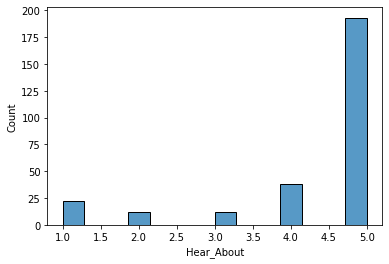

In [64]:
sns.histplot(films.Hear_About)

#### here, we know that 1 = television; 2 = newspaper; 3 = radio; 4 = website; 5 = word of mouth
#### since , **word of mouth** as 5.0 is highest one but it does not come under media outlet
### So, we'll go with the second one which is **4.0** i.e. ***WEBSITE***
* ***Therefore, film series should be advertised mainly in WEBSITE media outlet.***